In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [35]:
# อ่านข้อมูลใส่ลงใน df
df=pd.read_excel('LaptopSales.xls')
df.shape

(7956, 17)

In [36]:
df

,Date,Configuration,Customer Postcode,Store Postcode,Retail Price,Screen Size (Inches),Battery Life (Hours),RAM (GB),Processor Speeds (GHz),Integrated Wireless?,HD Size (GB),Bundled Applications?,OS X Customer,OS Y Customer,OS X Store,OS Y Store,CustomerStoreDistance
0,2008-01-01 00:01:19,163,EC4V 5BH,SE1 2BN,455,15,5,1,2.0,Yes,80,Yes,532041,180995,534057.0,179682.0,2405.873022
1,2008-01-01 00:02:52,320,SW4 0JL,SW12 9HD,545,15,6,1,2.0,No,300,No,529240,175537,528739.0,173080.0,2507.558574
2,2008-01-01 00:04:18,23,EC3V 1LR,E2 0RY,515,15,4,1,2.0,Yes,300,Yes,533095,181047,535652.0,182961.0,3194.001409
3,2008-01-01 00:04:40,169,SW1P 3AU,SE1 2BN,395,15,5,1,2.0,No,40,Yes,529902,179641,534057.0,179682.0,4155.202281
4,2008-01-01 00:06:04,365,EC4V 4EG,SW1V 4QQ,585,15,6,2,2.0,No,120,Yes,531684,180948,528924.0,178440.0,3729.298057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7951,2008-01-31 23:30:20,296,EC4V 6DE,SW1P 3AU,540,15,6,1,1.5,Yes,300,No,531801,181101,529902.0,179641.0,2395.370744
7952,2008-01-31 23:43:55,210,SE24 0NJ,SW1P 3AU,415,15,5,2,2.0,Yes,40,No,531580,174507,529902.0,179641.0,5401.262815
7953,2008-01-31 23:50:12,222,WC2H 0EA,NW5 2QH,455,15,5,2,2.0,No,120,No,529827,181231,529248.0,185213.0,4023.874377
7954,2008-01-31 23:57:25,196,W1D 3SU,SW1P 3AU,430,15,5,2,1.5,Yes,80,No,529614,181198,529902.0,179641.0,1583.411823


In [37]:
# จะดูชื่อ column ทั้งหมดใน dataset
df.columns

Index(['Date', 'Configuration', 'Customer Postcode', 'Store Postcode',
       'Retail Price', 'Screen Size (Inches)', 'Battery Life (Hours)',
       'RAM (GB)', 'Processor Speeds (GHz)', 'Integrated Wireless?',
       'HD Size (GB)', 'Bundled Applications?', 'OS X Customer',
       'OS Y Customer', 'OS X Store', 'OS Y Store', 'CustomerStoreDistance'],
      dtype='object')

In [38]:
# หาค่า average ของ retail price ในแต่ละร้าน
avg_df = df.groupby(['Store Postcode']).mean()
avg = avg_df.reset_index()
avg

,Store Postcode,Configuration,Retail Price,Screen Size (Inches),Battery Life (Hours),RAM (GB),Processor Speeds (GHz),HD Size (GB),OS X Customer,OS Y Customer,OS X Store,OS Y Store,CustomerStoreDistance
0,CR7 8LE,210.100000,488.619048,15.0,5.152381,1.576190,1.742857,149.619048,533315.328571,169504.700000,532714.0,168302.0,2877.854275
1,E2 0RY,202.497664,483.171729,15.0,5.115654,1.528037,1.749416,146.401869,534541.171729,182031.205607,535652.0,182961.0,3747.600380
2,E7 8NW,209.402062,494.381443,15.0,5.185567,1.474227,1.742268,165.360825,540549.381443,184902.536082,541428.0,184515.0,2917.233443
3,KT2 5AU,213.238095,493.904762,15.0,5.161905,1.580952,1.795238,148.761905,519022.933333,171020.133333,517917.0,170243.0,3398.098902
4,N17 6QA,232.308943,494.634146,15.0,5.300813,1.577236,1.768293,143.577236,532185.853659,187191.943089,533788.0,189994.0,5181.657714
5,N3 1DH,210.536842,487.368421,15.0,5.147368,1.557895,1.794737,152.631579,526855.326316,187849.957895,525109.0,190628.0,5305.895119
6,NW5 2QH,204.597701,486.580460,15.0,5.124138,1.541379,1.743103,152.528736,529864.229885,182968.586207,529248.0,185213.0,3462.862012
7,S1P 3AU,215.250000,486.250000,15.0,5.000000,2.000000,1.875000,145.000000,531467.250000,178950.250000,NaN,NaN,NaN
8,SE1 2BN,199.896916,486.680195,15.0,5.090909,1.530844,1.769481,153.603896,532851.487825,180648.285714,534057.0,179682.0,3149.266900
9,SE8 3JD,211.802222,492.177778,15.0,5.160000,1.597778,1.740000,147.911111,536376.477778,177476.597778,537175.0,177885.0,5221.468452


[Text(0, 0, 'SE1 2BN'),
 Text(0, 0, 'SW12 9HD'),
 Text(0, 0, 'E2 0RY'),
 Text(0, 0, 'SE1 2BN'),
 Text(0, 0, 'SW1V 4QQ'),
 Text(0, 0, 'SW1V 4QQ'),
 Text(0, 0, 'SE8 3JD'),
 Text(0, 0, 'E2 0RY'),
 Text(0, 0, 'SW18 1NN'),
 Text(0, 0, 'SW1V 4QQ'),
 Text(0, 0, 'CR7 8LE'),
 Text(0, 0, 'NW5 2QH'),
 Text(0, 0, 'W4 3PH'),
 Text(0, 0, 'SW1V 4QQ'),
 Text(0, 0, 'E2 0RY'),
 Text(0, 0, 'SE8 3JD')]

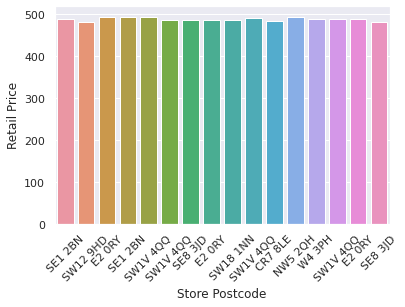

In [39]:
# เอามาพล็อตเป็น bar graph
bg=sns.barplot(x="Store Postcode", y="Retail Price", data=avg)
bg.set_xticklabels(df['Store Postcode'], rotation=45)

[Text(0, 0, 'SE1 2BN'),
 Text(0, 0, 'SW12 9HD'),
 Text(0, 0, 'E2 0RY'),
 Text(0, 0, 'SE1 2BN'),
 Text(0, 0, 'SW1V 4QQ'),
 Text(0, 0, 'SW1V 4QQ'),
 Text(0, 0, 'SE8 3JD'),
 Text(0, 0, 'E2 0RY'),
 Text(0, 0, 'SW18 1NN'),
 Text(0, 0, 'SW1V 4QQ'),
 Text(0, 0, 'CR7 8LE'),
 Text(0, 0, 'NW5 2QH'),
 Text(0, 0, 'W4 3PH'),
 Text(0, 0, 'SW1V 4QQ'),
 Text(0, 0, 'E2 0RY'),
 Text(0, 0, 'SE8 3JD')]

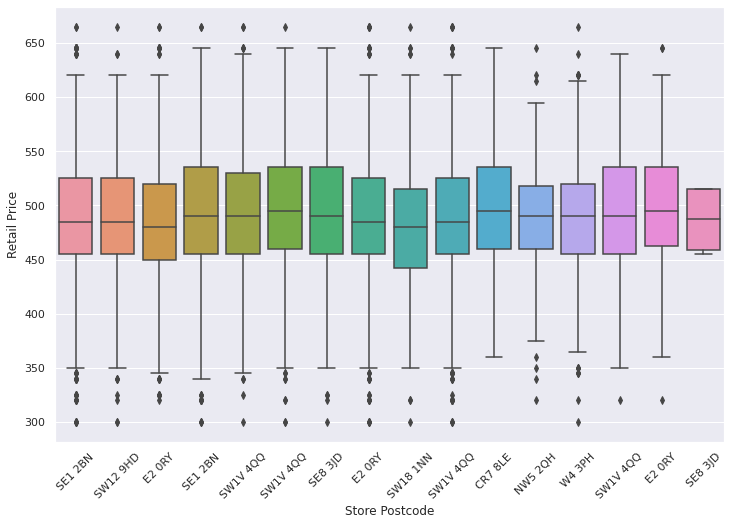

In [40]:
# สร้าง Boxplot แสดงค่าการกระจายตัวของ retail price ของทุกร้าน
sns.set(rc={'figure.figsize':(12,8)})
ax = sns.boxplot(x="Store Postcode", y="Retail Price", data=df)
ax.set_xticklabels(df['Store Postcode'], rotation=45)

In [41]:
# สร้าง dataframe ชุดใหม่ที่เอามาเฉพาะร้านที่ต้องการเปรียบเทียบคือร้าน N17 6QA กับร้าน W4 3PH
selected = ['N17 6QA', 'W4 3PH']
df2 = df[df['Store Postcode'].isin(selected)]
df2

,Date,Configuration,Customer Postcode,Store Postcode,Retail Price,Screen Size (Inches),Battery Life (Hours),RAM (GB),Processor Speeds (GHz),Integrated Wireless?,HD Size (GB),Bundled Applications?,OS X Customer,OS Y Customer,OS X Store,OS Y Store,CustomerStoreDistance
12,2008-01-01 01:05:10,300,TW9 3AH,W4 3PH,440,15,6,1,1.5,No,80,No,518891,177662,519585.0,177640.0,694.348616
93,2008-01-01 10:03:56,308,SW14 7QR,W4 3PH,485,15,6,1,2.0,Yes,80,No,520351,176144,519585.0,177640.0,1680.705804
152,2008-01-01 16:16:58,65,KT2 7PX,W4 3PH,445,15,4,2,2.0,Yes,40,Yes,519504,170070,519585.0,177640.0,7570.433343
194,2008-01-01 20:12:48,67,E17 9NL,N17 6QA,485,15,4,2,2.0,Yes,80,Yes,537855,188970,533788.0,189994.0,4193.931926
229,2008-01-01 23:33:36,353,N17 6QA,N17 6QA,545,15,6,2,2.0,Yes,40,Yes,533788,189994,533788.0,189994.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7844,2008-01-31 15:20:26,352,HA5 5PW,W4 3PH,570,15,6,2,1.5,No,300,No,512253,189590,519585.0,177640.0,14020.011555
7849,2008-01-31 15:43:11,61,KT1 2PY,W4 3PH,460,15,4,2,1.5,No,120,Yes,518498,169179,519585.0,177640.0,8530.538670
7861,2008-01-31 16:50:08,11,TW10 6DF,W4 3PH,390,15,4,1,1.5,No,80,Yes,518465,174996,519585.0,177640.0,2871.434485
7864,2008-01-31 16:57:08,304,N4 2HY,N17 6QA,520,15,6,1,1.5,No,300,No,531449,186729,533788.0,189994.0,4016.359795


[Text(0, 0, 'W4 3PH'), Text(0, 0, 'W4 3PH')]

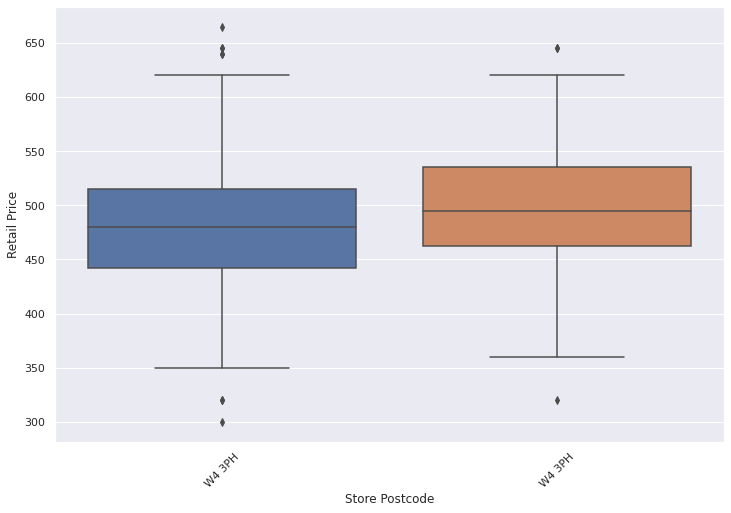

In [42]:
# สร้าง Boxplot แสดงค่าการกระจายตัวของ retail price ของสองร้านคือร้าน 'N17 6QA' และ 'W4 3PH'
sns.set(rc={'figure.figsize':(12,8)})
bx = sns.boxplot(x='Store Postcode', y="Retail Price", data=df2)
bx.set_xticklabels(df2['Store Postcode'], rotation=45)